In [1]:
import collections
import numpy as np
from tqdm import tqdm
import os
import random
import torch
from SPAIC import spaic
import torch.nn.functional as F
from SPAIC.spaic.Learning.Learner import Learner
from SPAIC.spaic.Library.Network_saver import network_save
from SPAIC.spaic.Library.Network_loader import network_load
from SPAIC.spaic.IO.Dataset import MNIST as dataset
from SPAIC.spaic.IO.Dataset import CUSTOM_MNIST
import gymnasium as gym
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter



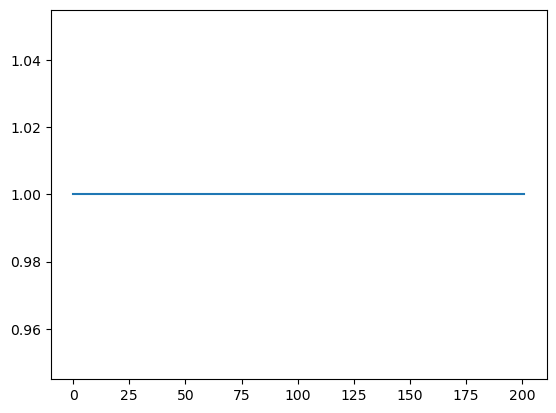

In [15]:
eval_acc = np.loadtxt('eval_acc.txt',delimiter=',',dtype=float)
plt.plot(eval_acc)

In [16]:
nd_eval_acc = np.loadtxt('nd_eval_acc.txt',delimiter=',',dtype=float)
plt.plot(nd_eval_acc)

FileNotFoundError: nd_eval_acc.txt not found.

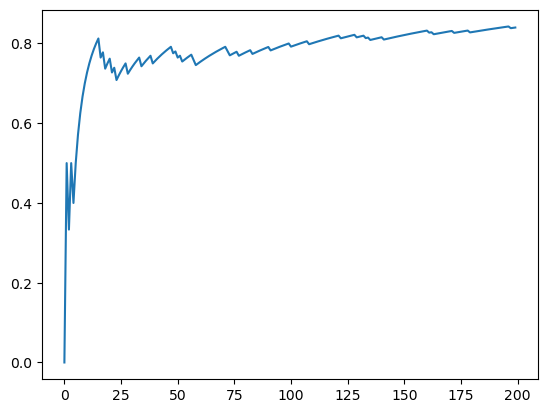

In [4]:
mic_eval_acc = np.loadtxt('cobot_eval_acc.txt',delimiter=',',dtype=float)
plt.plot(mic_eval_acc)

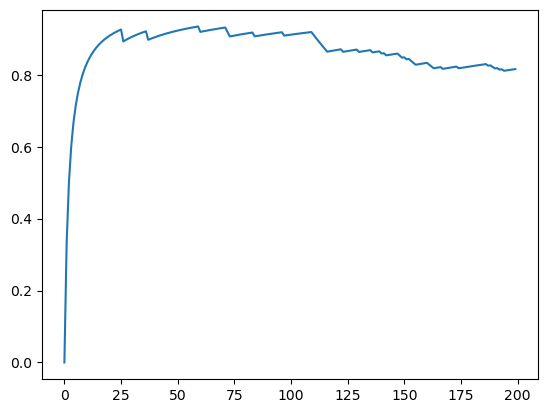

In [4]:
mic_eval_acc = np.loadtxt('cobot_test_acc_after_micc.txt',delimiter=',',dtype=float)
plt.plot(mic_eval_acc)

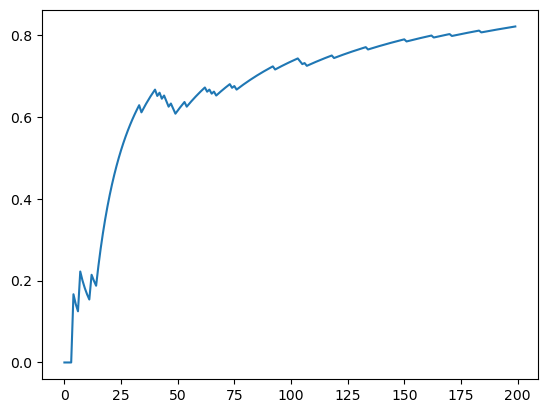

In [3]:
mic_eval_acc = np.loadtxt('cobot_test_acc_before_micc.txt',delimiter=',',dtype=float)
plt.plot(mic_eval_acc)

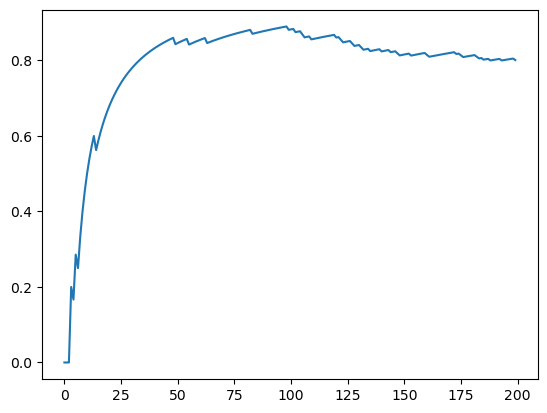

In [5]:
mic_eval_acc = np.loadtxt('cobot_test_acc_before_micc.txt',delimiter=',',dtype=float)
plt.plot(mic_eval_acc)

In [2]:
from collections import deque
a = deque(maxlen=3)
a.append(1)
a.append(3)
a.append(4)
a.append(42)

In [6]:
a.append(3)

In [7]:
a

deque([42, 3, 3], maxlen=3)

In [8]:
a.count(3)

2

In [9]:
ls = [1,2,3,4]

In [10]:
list(map(lambda x : x+1, ls))

[2, 3, 4, 5]

In [11]:
ls = [i for i  in range(12)]
ls

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [12]:
ls = list(map(lambda x : x+1, ls[0:6])) + ls[6:]
ls

[1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 11]

In [3]:
q = deque()

In [4]:
import torch

In [6]:
a = torch.rand(1,4)
a

tensor([[0.3751, 0.3410, 0.1773, 0.9466]])

In [10]:
q.append(torch.rand(1,4))

In [11]:
q

deque([tensor([[0.3208, 0.1714, 0.7444, 0.9250]]),
       tensor([[0.8126, 0.2357, 0.4515, 0.9587]]),
       tensor([[0.1868, 0.7134, 0.6690, 0.3622]]),
       tensor([[0.0441, 0.5411, 0.8416, 0.3050]])])

In [12]:
sum(q)

tensor([[1.3644, 1.6616, 2.7066, 2.5509]])

In [13]:
a = [[],[]]

In [14]:
a = torch.load('cobot_buffer.pth')

In [17]:
print(len(a[0]))

177


In [3]:
a = torch.load(r'C:\Users\admin\Desktop\ZJU\superbigbots\controllers\main_control\save\cobot\parameters\_parameters_dict.pt')

In [5]:
len(a)

3

In [13]:
print(a)


{'autoname1<net>_connection1<con>:autoname1<net>_layer1<neg><-autoname1<net>_input<nod>:{weight}': tensor([[1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.3552, 1.0000],
        [0.9966, 1.0000, 0.9926,  ..., 1.0000, 0.9967, 1.0000],
        [0.9999, 0.9987, 1.0000,  ..., 0.9988, 1.0000, 0.9674],
        ...,
        [0.9999, 0.6705, 0.3731,  ..., 0.9681, 1.0000, 0.3526],
        [0.9395, 0.9982, 0.2924,  ..., 0.9983, 0.9998, 0.9982],
        [1.0000, 0.9981, 0.9970,  ..., 0.9982, 0.9998, 0.9981]],
       device='cuda:0', requires_grad=True), 'autoname1<net>_connection3<con>:autoname1<net>_layer1<neg><-autoname1<net>_layer2<neg>:{weight}': tensor([[  -0., -120., -120.,  ..., -120., -120., -120.],
        [-120.,   -0., -120.,  ..., -120., -120., -120.],
        [-120., -120.,   -0.,  ..., -120., -120., -120.],
        ...,
        [-120., -120., -120.,  ...,   -0., -120., -120.],
        [-120., -120., -120.,  ..., -120.,   -0., -120.],
        [-120., -120., -120.,  ..., -120., -120.,   -0.]

In [2]:
from cobot_emo_net import EMONET

In [3]:
emo = EMONET()

In [4]:
model_path = 'save\cobot'

In [5]:
emo.state_from_dict(filename=model_path, device=torch.device("cuda"))

c:\Users\admin\Desktop\ZJU\superbigbots\controllers\main_control\SPAIC\spaic\Network\Network.py:466: UserWarning: Backend device setting is [device(type='cuda')]. Backend device selection is priority.
  warnings.warn(


In [6]:
a = spaic.Network_saver.network_save(emo, filename='testnew1', save=True, combine=False)


yes
yes
Save Complete.


In [17]:
# c = torch.load(f='testnew1/parameters/_parameters_dict.pt')
# c = torch.load(f='testnew1/parameters/_variables.pt')
c = torch.load(f='testnew1/parameters/_variables.pt') # 这个是最全的一个输出
for key, val in c.items():
    print(key)
    print(val)

[dt]
0.1
[batch_size]
1
autoname1<net>_input<nod>:{O}
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')
autoname1<net>_layer1<neg>:{I}
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]], device='cuda:0')
autoname1<net>_layer2<neg>:{I}
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 

In [18]:
c = torch.load(f='testnew1/parameters/_parameters_dict.pt')

for key, val in c.items():
    print(key)
    print(val)

autoname1<net>_connection2<con>:autoname1<net>_layer2<neg><-autoname1<net>_layer1<neg>:{weight}
tensor([[22.5000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000, 22.5000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, 22.5000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ..., 22.5000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 22.5000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000, 22.5000]],
       device='cuda:0')
autoname1<net>_connection3<con>:autoname1<net>_layer1<neg><-autoname1<net>_layer2<neg>:{weight}
tensor([[  -0., -120., -120.,  ..., -120., -120., -120.],
        [-120.,   -0., -120.,  ..., -120., -120., -120.],
        [-120., -120.,   -0.,  ..., -120., -120., -120.],
        ...,
        [-120., -120., -120.,  ...,   -0., -120., -120.],
        [-120., -120., -120.,  ..., -120.,   -0., -120.],
        [-120., -120., -120.,  ..., -120., -120

In [9]:
os.listdir()

['parameters']

In [25]:
emo.__dict__

AttributeError: 'EMONET' object has no attribute 'state_dict'

In [27]:
torch.save(emo._backend._parameters_dict, 'save/dict.pth')

In [29]:
a = torch.load(model_path)

In [31]:
for key, val in a.items():
    print(key)
    print(val.shape)

autoname1<net>_connection1<con>:autoname1<net>_layer1<neg><-autoname1<net>_input<nod>:{weight}
torch.Size([100, 12])
autoname1<net>_connection2<con>:autoname1<net>_layer2<neg><-autoname1<net>_layer1<neg>:{weight}
torch.Size([100, 100])
autoname1<net>_connection3<con>:autoname1<net>_layer1<neg><-autoname1<net>_layer2<neg>:{weight}
torch.Size([100, 100])
